<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/9thWeekTask/SVM_Classification_for_MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/MaterialStrength.csv'

# Membaca file CSV ke dalam DataFrame
dataset = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(dataset.head())

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [5]:
# Memeriksa distribusi nilai dalam kolom target_feature
dataset['target_feature'].describe(), dataset['target_feature'].value_counts()


(count    1030.000000
 mean       35.817961
 std        16.705742
 min         2.330000
 25%        23.710000
 50%        34.445000
 75%        46.135000
 max        82.600000
 Name: target_feature, dtype: float64,
 target_feature
 33.40    6
 77.30    4
 79.30    4
 31.35    4
 71.30    4
         ..
 47.40    1
 51.96    1
 56.74    1
 17.57    1
 32.77    1
 Name: count, Length: 845, dtype: int64)

In [6]:
import numpy as np

# Mengkategorikan target_feature menjadi 3 kelas berdasarkan distribusi kuantil
bins = [dataset['target_feature'].min(), 25, 50, dataset['target_feature'].max()]
labels = ['Low', 'Medium', 'High']
dataset['target_class'] = pd.cut(dataset['target_feature'], bins=bins, labels=labels)

# Memeriksa distribusi kategori baru
dataset['target_class'].value_counts()


,count
target_class,
Medium,525
Low,294
High,210


In [10]:
# Memeriksa nilai NaN
print(dataset.isnull().sum())


x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
target_feature    0
target_class      1
dtype: int64


In [12]:
# Menghapus baris dengan nilai NaN pada kolom 'target_class'
dataset = dataset.dropna(subset=['target_class'])

# Memeriksa kembali apakah masih ada nilai NaN pada kolom 'target_class'
print(dataset['target_class'].isnull().sum())


0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Memisahkan fitur (X) dan target (y)
X = dataset.drop(columns=['target_feature', 'target_class', 'x14', 'x15'])  # Menghapus target dan fitur kategorikal
y = dataset['target_class']

# Encoding target label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((823, 13), (206, 13))

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Membuat model SVM dengan kernel linear
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model pada data latih
svm_model.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = svm_model.predict(X_test_scaled)

# Menampilkan classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.83      0.84        42
         Low       0.91      0.90      0.91        59
      Medium       0.88      0.90      0.89       105

    accuracy                           0.88       206
   macro avg       0.88      0.88      0.88       206
weighted avg       0.88      0.88      0.88       206



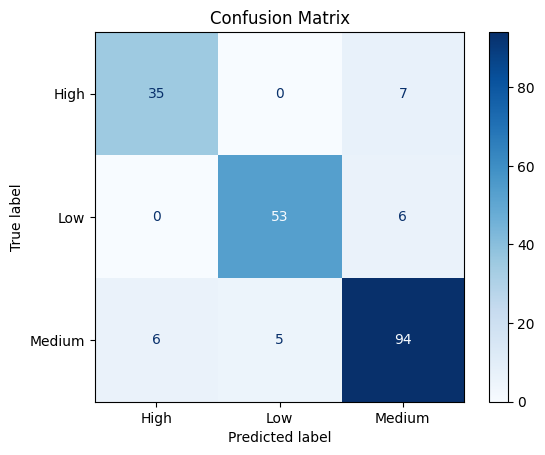

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk grafik
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
